# Fraud Detection with Isolation Forest (Location Outlier Emphasis)
This notebook demonstrates fraud detection using Isolation Forest, focusing on location-based anomalies in the synthetic dataset.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('./synthetic_fraud_detection_location_outlier.csv')
df.head()

,transaction_id,amount,transaction_time,location,is_fraud
0,1,52.34,2025-07-01 08:15:23,Phnom Penh,0
1,2,23.45,2025-07-01 09:12:11,Phnom Penh,0
2,3,75.12,2025-07-01 10:45:09,Phnom Penh,0
3,4,18.90,2025-07-01 11:30:45,Phnom Penh,0
4,5,120.00,2025-07-01 12:05:33,Phnom Penh,0


## Data Overview
Let's check the distribution of locations and transaction amounts.

location
Phnom Penh    190
New York       10
Name: count, dtype: int64


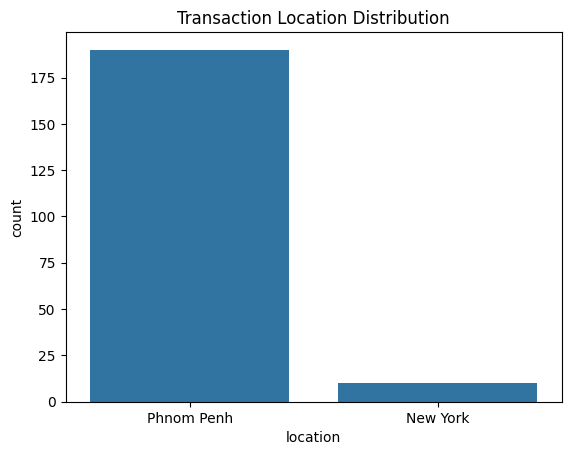

In [3]:
# Location distribution
print(df['location'].value_counts())
sns.countplot(x='location', data=df)
plt.title('Transaction Location Distribution')
plt.show()

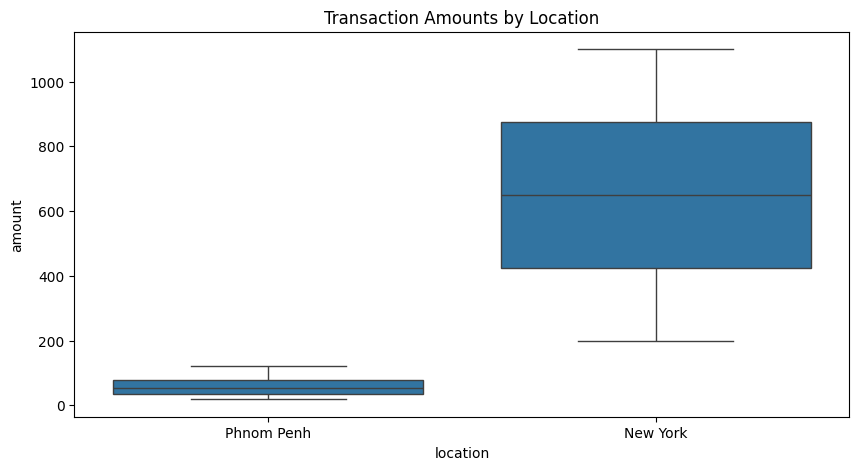

In [4]:
# Transaction amount by location
plt.figure(figsize=(10,5))
sns.boxplot(x='location', y='amount', data=df)
plt.title('Transaction Amounts by Location')
plt.show()

## Encode Location Feature
Isolation Forest requires numerical features. We'll encode location as a binary variable.

In [5]:
# Encode location: 0 for Phnom Penh, 1 for New York
df['location_encoded'] = (df['location'] == 'New York').astype(int)
features = ['amount', 'location_encoded']
X = df[features]

## Fit Isolation Forest and Predict Anomalies

In [6]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(X)
df['predicted_fraud'] = (df['anomaly_score'] == -1).astype(int)
df[['location', 'amount', 'is_fraud', 'predicted_fraud']].head(15)

,location,amount,is_fraud,predicted_fraud
0,Phnom Penh,52.34,0,0
1,Phnom Penh,23.45,0,0
2,Phnom Penh,75.12,0,0
3,Phnom Penh,18.90,0,0
4,Phnom Penh,120.00,0,0
5,Phnom Penh,45.67,0,0
6,Phnom Penh,33.21,0,0
7,Phnom Penh,67.89,0,0
8,Phnom Penh,29.99,0,0
9,Phnom Penh,88.76,0,0


## Evaluation
Let's see how well the model detected location-based fraud.

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(df['is_fraud'], df['predicted_fraud']))
print(classification_report(df['is_fraud'], df['predicted_fraud']))

[[190   0]
 [  0  10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00        10

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Visualize Detected Anomalies by Location
Plot the transaction amounts, highlighting detected anomalies and locations.

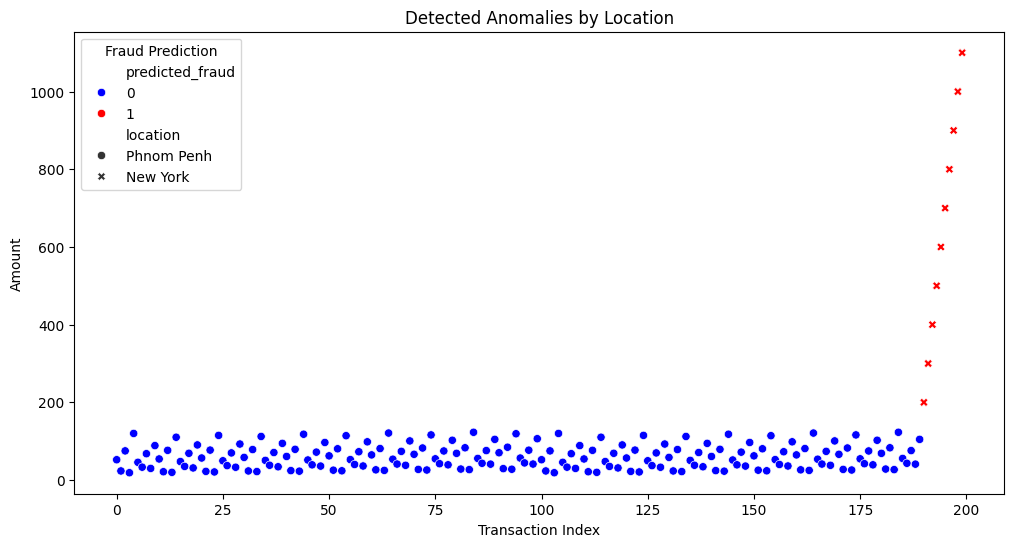

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=range(len(df)), y='amount', hue='predicted_fraud', style='location', data=df, palette=['blue','red'])
plt.title('Detected Anomalies by Location')
plt.xlabel('Transaction Index')
plt.ylabel('Amount')
plt.legend(title='Fraud Prediction')
plt.show()